In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [66]:
df=pd.read_csv("../data/dataset.csv")
df.head()


,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [7]:
#df.info()
df.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,27235.000000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000.000000,30000.000000,30000.000000,27270.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,2.074813,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,1.410047,9.252956,7.280415,2.121194
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.639566,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,1.000000,8.000000,4.541872,3.363580
50%,41.000000,3.025913,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,2.000000,16.000000,10.013677,4.951049
75%,53.000000,4.368917,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,3.000000,24.000000,15.300809,6.581323
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


<Axes: >

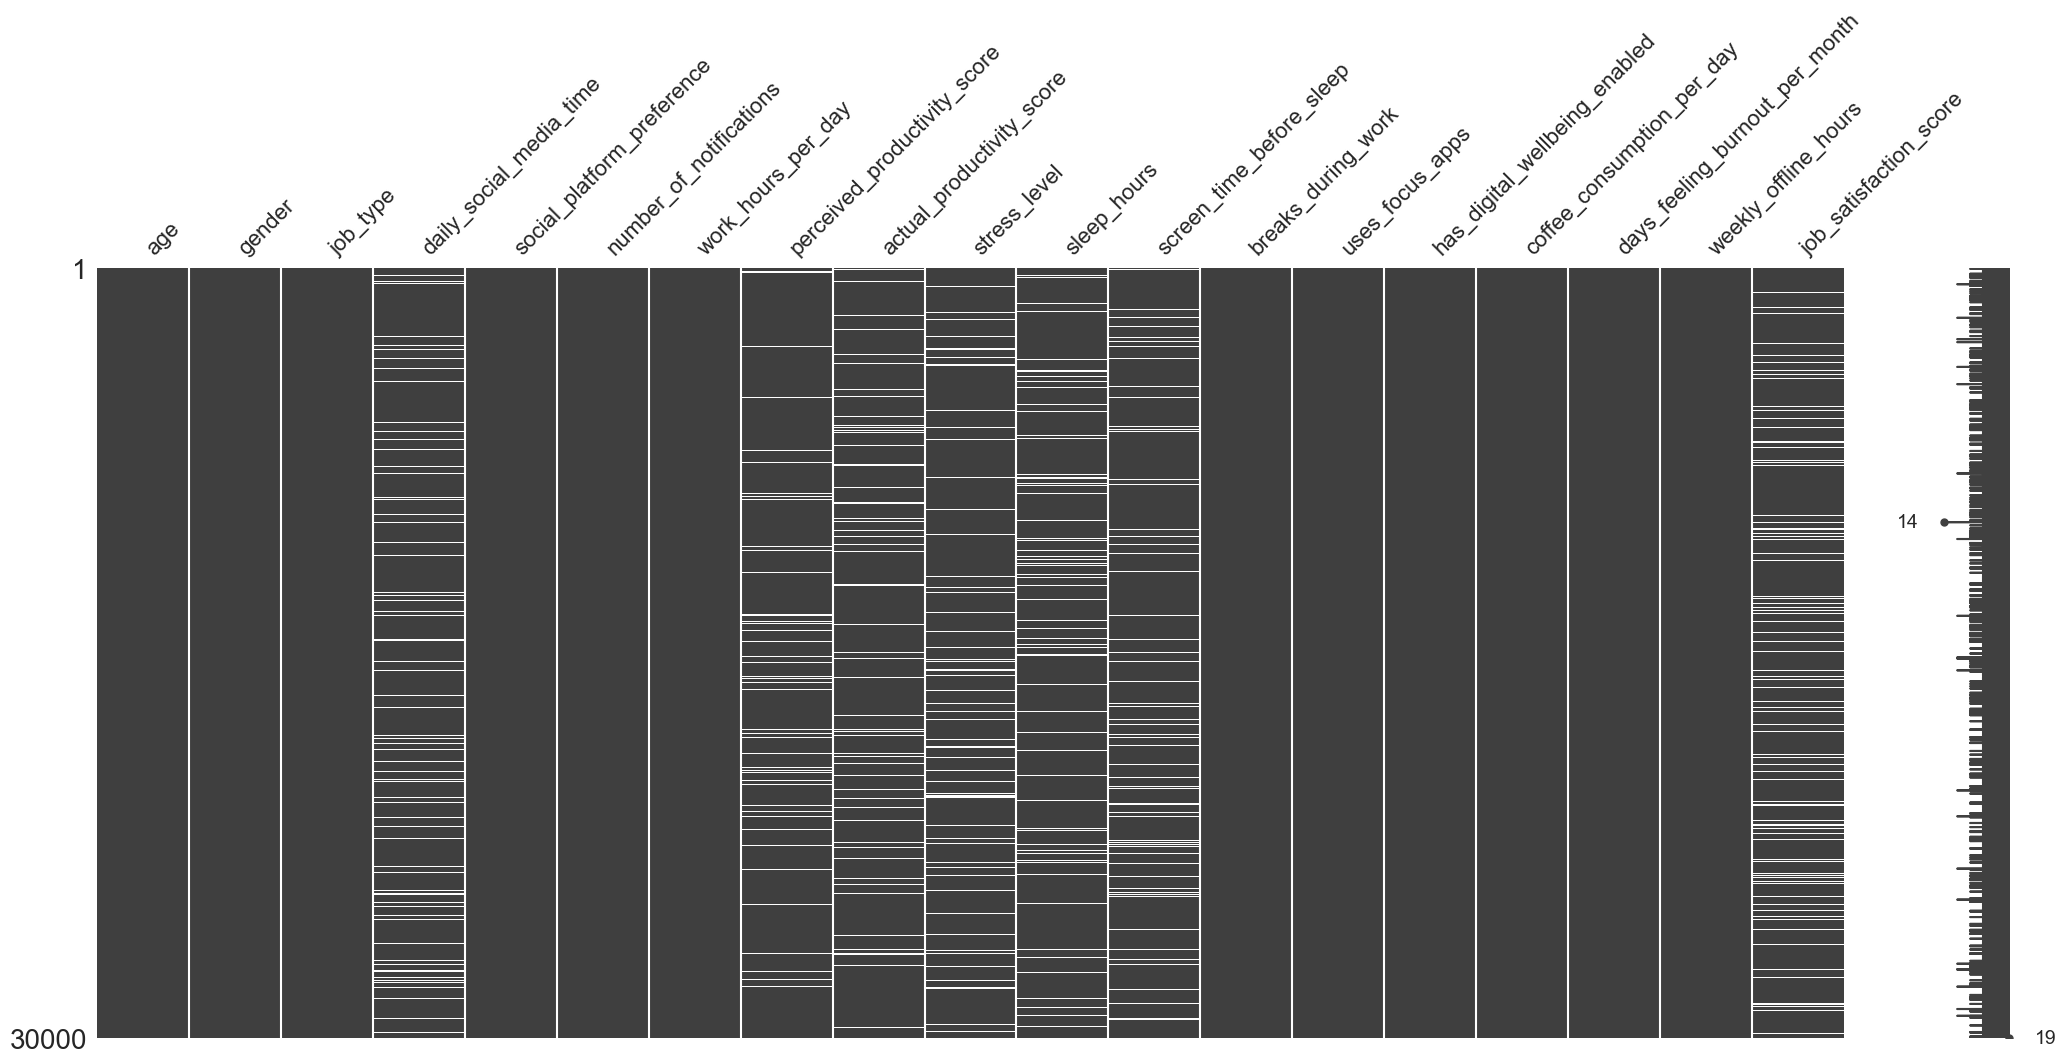

In [26]:
# visualize missing info
msno.matrix(df)

In [5]:
df.isnull().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

In [8]:
#Basic Statics
df.describe()
df.describe(include='object')  # for categorical columns


,gender,job_type,social_platform_preference
count,30000,30000,30000
unique,3,6,5
top,Male,Education,TikTok
freq,14452,5055,6096


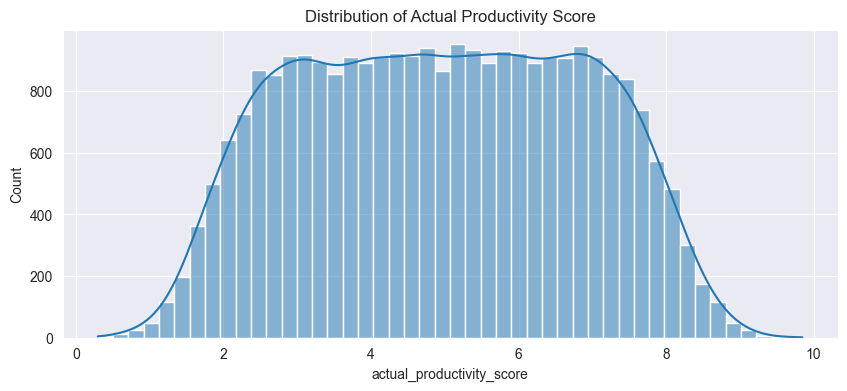

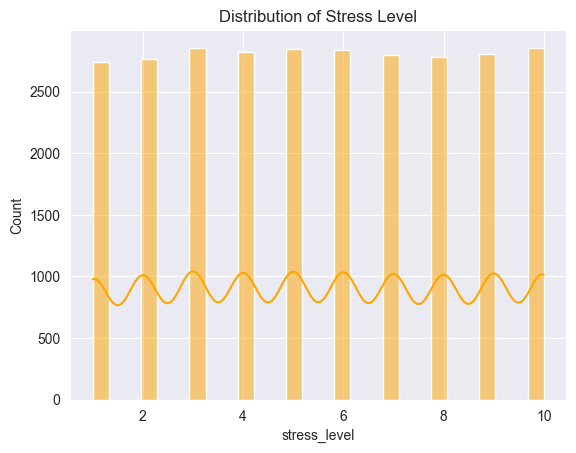

In [9]:
#Target Distribution (Regression Targets)
plt.figure(figsize=(10, 4))
sns.histplot(df['actual_productivity_score'], kde=True)
plt.title("Distribution of Actual Productivity Score")
plt.show()

sns.histplot(df['stress_level'], kde=True, color="orange")
plt.title("Distribution of Stress Level")
plt.show()


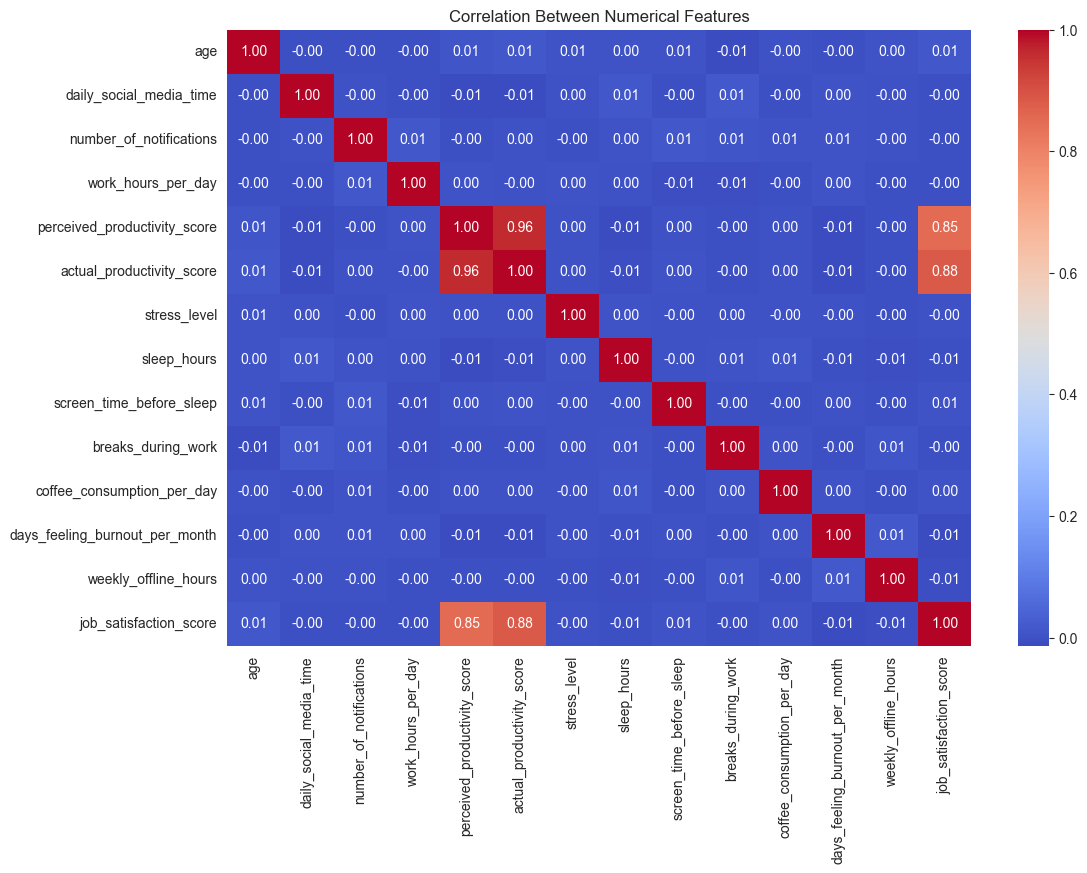

In [11]:
#Correlation Heatmap
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.show()



In [67]:
#Missing Values
#as dataset is large so we can drop missing values
#if dataset is small then we will compute means for each column and replace it with missing values

df = df.dropna(subset=['actual_productivity_score', 'stress_level'])


df['daily_social_media_time'] = df['daily_social_media_time'].fillna(df['daily_social_media_time'].median())
df['perceived_productivity_score'] = df['perceived_productivity_score'].fillna(df['perceived_productivity_score'].median())

df['sleep_hours'] = df['sleep_hours'].fillna(df['sleep_hours'].median())
df['screen_time_before_sleep'] = df['sleep_hours'].fillna(df['sleep_hours'].median())

# Check new shape
print("Shape after dropping missing values:", df.shape)


Shape after dropping missing values: (25880, 19)


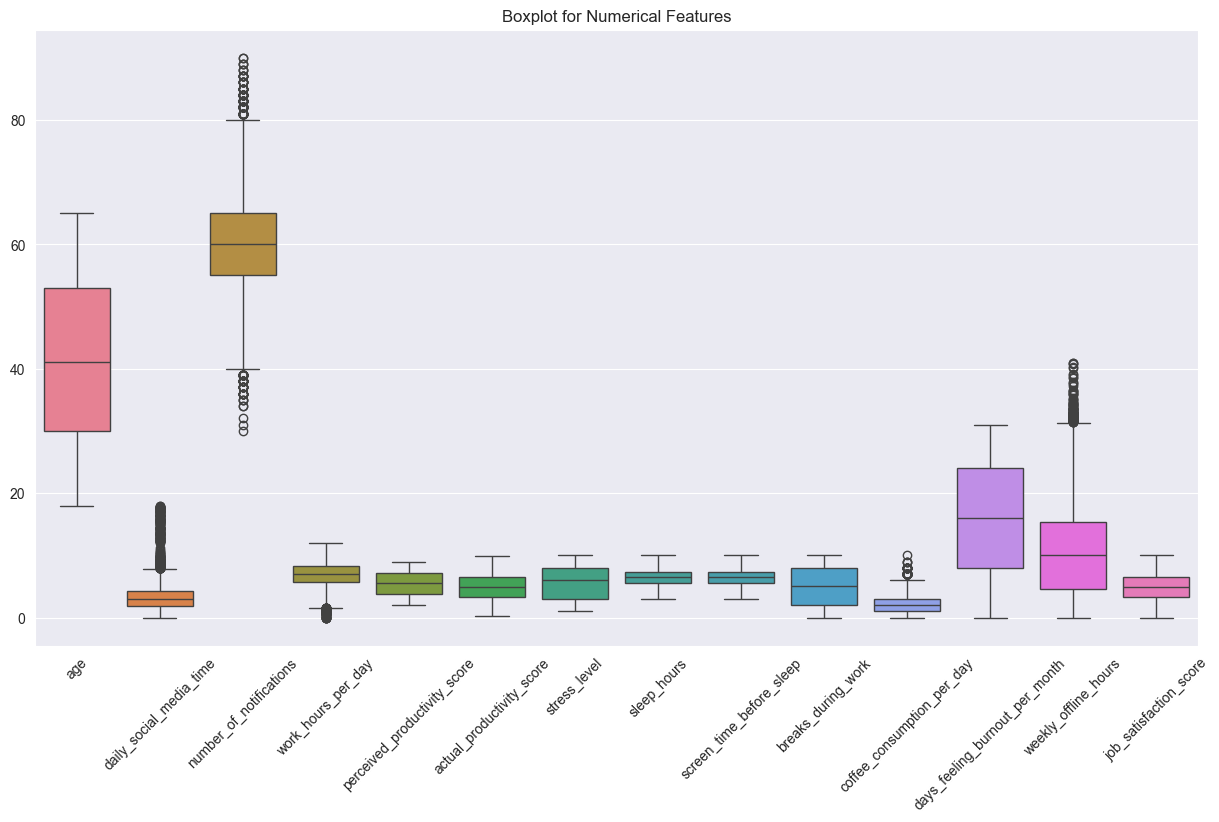

In [68]:
#Lets Detect Outliers

plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot for Numerical Features")
plt.xticks(rotation=45)
plt.show()



In [69]:
# Cap outliers for a numeric column
def detect_and_clip_outliers(df, column, factor=1.5):
    if column not in df.columns:
        print(f"❌ Column '{column}' not found in the DataFrame.")
        return df

    if not pd.api.types.is_numeric_dtype(df[column]):
        print(f"❌ Column '{column}' is not numeric.")
        return df

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"📊 Detected {len(outliers)} outliers in '{column}'\n")


    # Clip outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


    return df



In [73]:
df = detect_and_clip_outliers(df, 'weekly_offline_hours')
df = detect_and_clip_outliers(df, 'daily_social_media_time')
df = detect_and_clip_outliers(df, 'number_of_notifications')
df = detect_and_clip_outliers(df, 'coffee_consumption_per_day')




📊 Detected 0 outliers in 'weekly_offline_hours'

📊 Detected 0 outliers in 'daily_social_media_time'

📊 Detected 0 outliers in 'number_of_notifications'

📊 Detected 0 outliers in 'coffee_consumption_per_day'



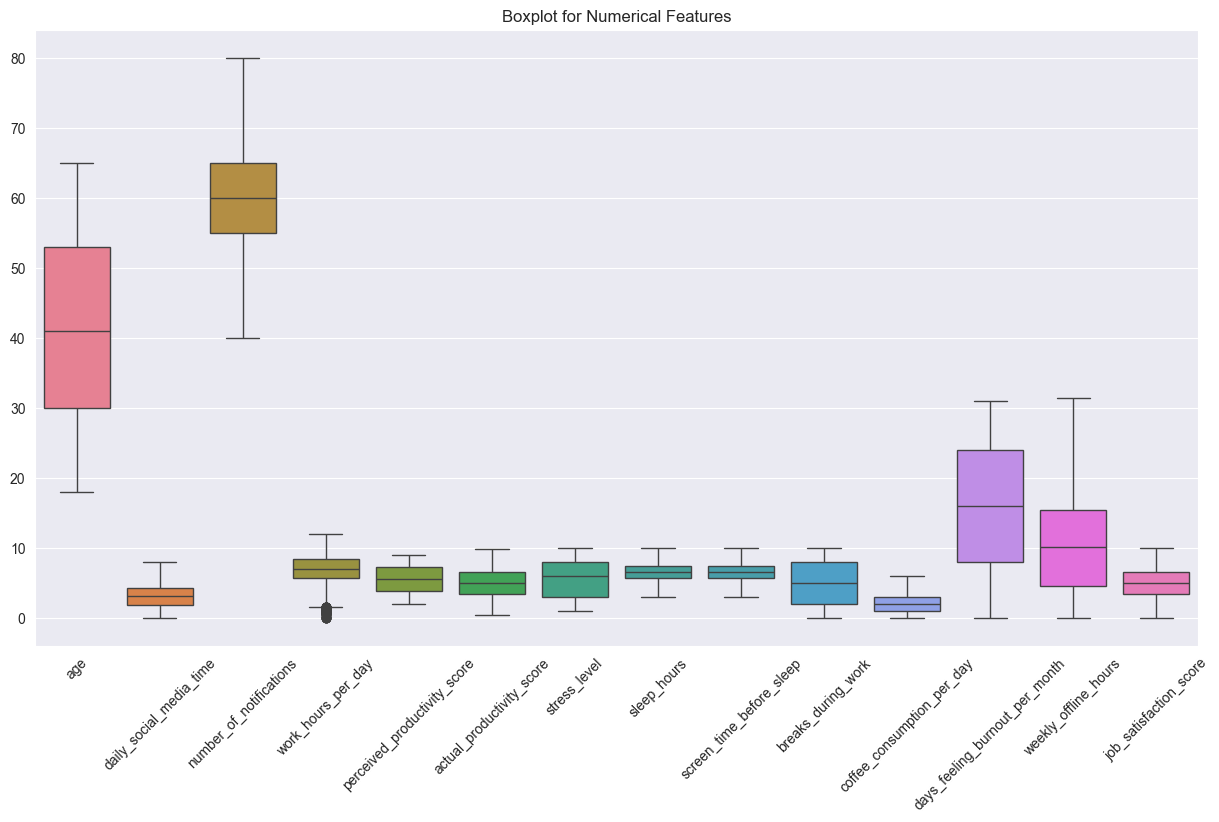

In [74]:
#Recheck Box plot after removing outliers

plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot for Numerical Features")
plt.xticks(rotation=45)
plt.show()



In [75]:
# One-hot encode categorical columns using pandas
categorical_columns = ['gender', 'job_type', 'social_platform_preference', 'uses_focus_apps', 'has_digital_wellbeing_enabled']

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df.head()


,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,...,job_type_Health,job_type_IT,job_type_Student,job_type_Unemployed,social_platform_preference_Instagram,social_platform_preference_Telegram,social_platform_preference_TikTok,social_platform_preference_Twitter,uses_focus_apps_True,has_digital_wellbeing_enabled_True
0,56,4.180940,61,6.753558,8.040464,7.291555,4.0,5.116546,5.116546,8,...,False,False,False,True,False,False,False,False,False,False
1,46,3.249603,59,9.169296,5.063368,5.165093,7.0,5.103897,5.103897,7,...,True,False,False,False,False,False,False,True,True,True
2,32,3.030367,57,7.910952,3.861762,3.474053,4.0,8.583222,8.583222,0,...,False,False,False,False,False,False,False,True,True,False
3,60,3.030367,59,6.355027,2.916331,1.774869,6.0,6.052984,6.052984,1,...,False,False,False,True,False,False,False,False,False,False
5,38,1.512568,50,6.429312,5.528808,4.081026,5.0,5.515251,5.515251,5,...,False,False,False,False,False,False,False,True,False,True


In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Define features to scale
num_cols = ['age', 'daily_social_media_time', 'number_of_notifications',
            'work_hours_per_day', 'perceived_productivity_score']

df[num_cols] = scaler.fit_transform(df[num_cols])

df.isnull().sum()

age                                        0
daily_social_media_time                    0
number_of_notifications                    0
work_hours_per_day                         0
perceived_productivity_score               0
actual_productivity_score                  0
stress_level                               0
sleep_hours                                0
screen_time_before_sleep                   0
breaks_during_work                         0
coffee_consumption_per_day                 0
days_feeling_burnout_per_month             0
weekly_offline_hours                       0
job_satisfaction_score                  2340
gender_Male                                0
gender_Other                               0
job_type_Finance                           0
job_type_Health                            0
job_type_IT                                0
job_type_Student                           0
job_type_Unemployed                        0
social_platform_preference_Instagram       0
social_pla

In [77]:
df.to_csv('../data/cleaned_dataset.csv', index=False)
